<a href="https://colab.research.google.com/github/fabiacamile/python-for-finance/blob/main/Getting_Started_with_Python_for_Finance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Getting Started with Python for Finance


---


### LinkedIn Learning course


**Course Details**

Python has quickly become one of the most popular and widely used programming languages in the world. And if you work in finance and analyze the stock market or other financial instruments, you need to stay up to date with the most important analytic tools. Join instructor Matt Harrison to get up and running with Python, in this course designed uniquely for financial analysis.

Learn how to implement the best practices for loading data and visualizations, performing calculations, ingesting and preparing financial data, coding technical analysis signals, and more. Along the way, test out your new skills in the challenges and coding exercises at the end of each section. Upon completing this course, you’ll be ready to start leveraging the power of Python to optimize your financial analysis workflow.


---

**Skills**

Python (Programming Language)

Financial Analysis

## Loading Data and Visualizations


**Loading Data**


In [2]:
#importa as bibliotecas necessárias para manipulação de dados e criação de visualizaçoes

from matplotlib import dates
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import yfinance as yf

/usr/local/lib/python3.10/dist-packages/yfinance/base.py:48: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  _empty_series = pd.Series()


In [9]:
raw = yf.download("SPY AAPL", start= "2010-01-01", end= "2019-12-31")

[*********************100%%**********************]  2 of 2 completed


In [10]:
#Apresenta um dataframe, onde o index é uma data (dia)
raw

Price       Adj Close                  Close                   High  \
Ticker           AAPL         SPY       AAPL         SPY       AAPL   
Date                                                                  
2010-01-04   6.479000   87.129936   7.643214  113.330002   7.660714   
2010-01-05   6.490200   87.360580   7.656429  113.629997   7.699643   
2010-01-06   6.386966   87.422073   7.534643  113.709999   7.686786   
2010-01-07   6.375156   87.791130   7.520714  114.190002   7.571429   
2010-01-08   6.417541   88.083260   7.570714  114.570000   7.571429   
...               ...         ...        ...         ...        ...   
2019-12-23  69.170479  301.631042  71.000000  321.220001  71.062500   
2019-12-24  69.236221  301.640472  71.067497  321.230011  71.222504   
2019-12-26  70.609901  303.246124  72.477501  322.940002  72.495003   
2019-12-27  70.583084  303.171021  72.449997  322.859985  73.492500   
2019-12-30  71.002014  301.499573  72.879997  321.079987  73.172501   

Price                         Low                   Open              \
Ticker             SPY       AAPL         SPY       AAPL         SPY   
Date                                                                   
2010-01-04  113.389999   7.585000  111.510002   7.622500  112.370003   
2010-01-05  113.680000   7.616071  112.849998   7.664286  113.260002   
2010-01-06  113.989998   7.526786  113.430000   7.656429  113.519997   
2010-01-07  114.330002   7.466071  113.180000   7.562500  113.500000   
2010-01-08  114.620003   7.466429  113.660004   7.510714  113.889999   
...                ...        ...         ...        ...         ...   
2019-12-23  321.649994  70.092499  321.059998  70.132500  321.589996   
2019-12-24  321.519989  70.730003  320.899994  71.172501  321.470001   
2019-12-26  322.950012  71.175003  321.640015  71.205002  321.649994   
2019-12-27  323.799988  72.029999  322.279999  72.779999  323.739990   
2019-12-30  323.100006  71.305000  320.549988  72.364998  322.950012   

Price          Volume             
Ticker           AAPL        SPY  
Date                              
2010-01-04  493729600  118944600  
2010-01-05  601904800  111579900  
2010-01-06  552160000  116074400  
2010-01-07  477131200  131091100  
2010-01-08  447610800  126402800  
...               ...        ...  
2019-12-23   98572000   52990000  
2019-12-24   48478800   20270000  
2019-12-26   93121200   30911200  
2019-12-27  146266000   42528800  
2019-12-30  144114400   49729100  

[2515 rows x 12 columns]

In [6]:
raw.columns

MultiIndex([('Adj Close', 'AAPL'),
            ('Adj Close',  'SPY'),
            (    'Close', 'AAPL'),
            (    'Close',  'SPY'),
            (     'High', 'AAPL'),
            (     'High',  'SPY'),
            (      'Low', 'AAPL'),
            (      'Low',  'SPY'),
            (     'Open', 'AAPL'),
            (     'Open',  'SPY'),
            (   'Volume', 'AAPL'),
            (   'Volume',  'SPY')],
           names=['Price', 'Ticker'])

In [15]:
#mostra a documentação de pipe
raw.pipe?

In [27]:
#Define a função fix columns para retornar apenas os dados da apple
def fix_columns (df):
  columns = df.columns
  outer = [col[0] for col in columns]
  df.columns = outer

  return df

'''
(raw
 .iloc[:, ::2]
 .pipe(fix_columns)
 )
'''

def tweak_data():
  raw = yf.download("SPY AAPL", start= "2010-01-01", end= "2019-12-31")

  return (raw
    .iloc[:, ::2] #aqui é definido quais dados serão mantidos no df por posição - a partir da posição 0, a cada duas colunas
    .pipe(fix_columns)
  )

tweak_data()


[*********************100%%**********************]  2 of 2 completed


,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2010-01-04,6.479000,7.643214,7.660714,7.585000,7.622500,493729600
2010-01-05,6.490200,7.656429,7.699643,7.616071,7.664286,601904800
2010-01-06,6.386966,7.534643,7.686786,7.526786,7.656429,552160000
2010-01-07,6.375156,7.520714,7.571429,7.466071,7.562500,477131200
2010-01-08,6.417541,7.570714,7.571429,7.466429,7.510714,447610800
...,...,...,...,...,...,...
2019-12-23,69.170479,71.000000,71.062500,70.092499,70.132500,98572000
2019-12-24,69.236221,71.067497,71.222504,70.730003,71.172501,48478800
2019-12-26,70.609901,72.477501,72.495003,71.175003,71.205002,93121200


**Line plots**

<Axes: xlabel='Date'>

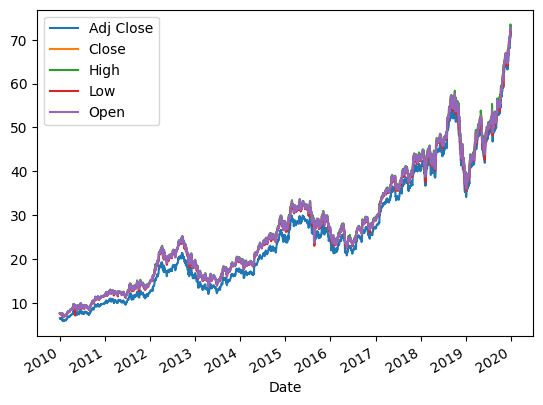

In [30]:
(raw
 .iloc[:, :-2:2]
 .pipe(fix_columns)
 .plot()
 )

<Axes: xlabel='Date'>

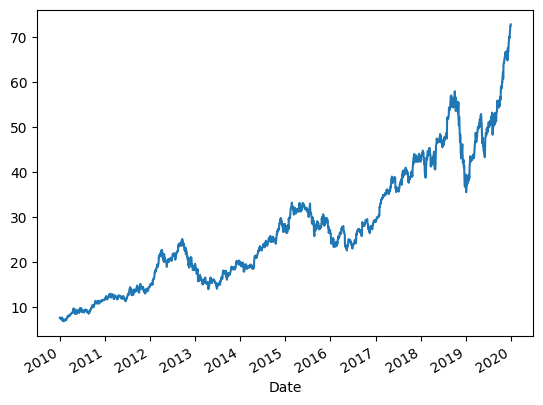

In [31]:
(raw
 .iloc[:, ::2]
 .pipe(fix_columns)
 .Close
 .plot()
 )

<Axes: xlabel='Date'>

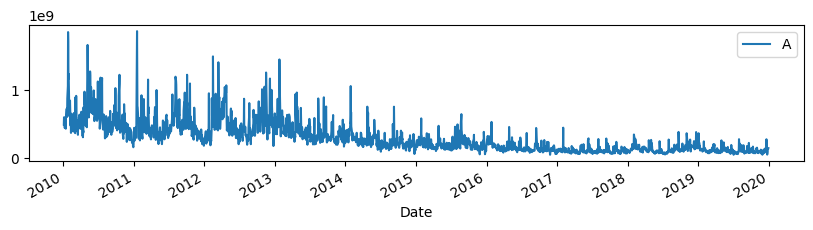

In [34]:
(raw
 .iloc[:, ::2]
 .Volume
 .pipe(fix_columns)
 .plot(figsize = (10,2))
 )

**Resampling data**

<Axes: xlabel='Date'>

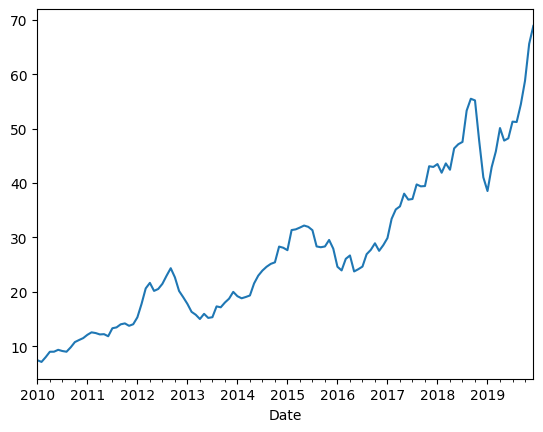

In [37]:
(raw
 .iloc[:, ::2]
 .pipe(fix_columns)
 .resample('M') #offset alias
 .Close
 .mean()
 .plot()
 )

**Candlestick plot from scratch**